In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import re
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('data_res.csv', index_col = 0)

In [3]:
data = data.dropna(subset='업종분류')

In [4]:
data['수요'] = data['업종분류'].apply(lambda x: 1 if data['업종분류'].value_counts()[x] > 3 else 0)
data.isna().sum()

기업명                0
업종분류               0
사원수              922
설립연도               0
기업형태             815
매출액              165
주소                 8
직무                 0
자격요건              19
직급                 0
이용하는기술스택/우대사항      7
해당 페이지 URL         0
기업 홈페이지 URL       33
수요                 0
dtype: int64

<Axes: xlabel='수요', ylabel='count'>

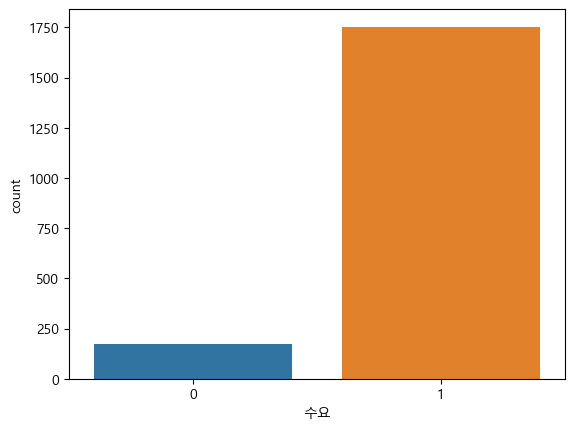

In [5]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
sns.countplot(x = data['수요'])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1927 entries, 0 to 1964
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기업명            1927 non-null   object 
 1   업종분류           1927 non-null   object 
 2   사원수            1005 non-null   float64
 3   설립연도           1927 non-null   float64
 4   기업형태           1112 non-null   object 
 5   매출액            1762 non-null   float64
 6   주소             1919 non-null   object 
 7   직무             1927 non-null   object 
 8   자격요건           1908 non-null   object 
 9   직급             1927 non-null   int64  
 10  이용하는기술스택/우대사항  1920 non-null   object 
 11  해당 페이지 URL     1927 non-null   object 
 12  기업 홈페이지 URL    1894 non-null   object 
 13  수요             1927 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 225.8+ KB


In [67]:
# contingency_table = pd.crosstab(data['수요'], data[ 이 부분 수정하시면 됩니다.])

contingency_table = pd.crosstab(data['수요'], data['주소'])
display(contingency_table)
chi2 , p_value , _, _= chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
alpha = 0.05

if p_value < alpha:
    print("귀무가설 기각. \n통계적으로 유의미한 연관성이 있다.")
else:
    print("귀무가설 기각할 수 없음. \n통계적으로 유의미한 연관성이 없다.")

주소,강원도 인제군,강원도 춘천시,경기도 고양시 일산동구,경기도 고양시 일산서구,경기도 과천시,경기도 광명시,경기도 군포시,경기도 군포시 당동,경기도 남양주시,경기도 성남시 분당구,...,인천광역시 서구,인천광역시 연수구,전라남도 목포시,전라북도 완주군,전라북도 전주시 완산구,제주특별자치도 서귀포시,제주특별자치도 제주시,충청남도 아산시,충청남도 예산군,충청남도 천안시 서북구
수요,,,,,,,,,,,,,,,,,,,,,
0,0,2,3,1,0,0,0,0,0,6,...,0,1,3,0,0,1,1,0,3,3
1,4,0,0,10,2,4,3,3,3,175,...,8,33,0,1,2,0,19,12,0,14


Chi-square statistic: 329.83904893681165
P-value: 5.056018572498105e-36
귀무가설 기각. 
통계적으로 유의미한 연관성이 있다.


# 업종 분류별 수요가 높은 그룹의 특징

* 주소                  
>Chi-square statistic: 329.83904893681165                  
>P-value: 5.056018572498105e-36                    
>귀무가설 기각.                                      
>통계적으로 유의미한 연관성이 있다.

* 직급              
>Chi-square statistic: 19.762825656511534              
>P-value: 0.03157746933515181                      
>귀무가설 기각.                              
>통계적으로 유의미한 연관성이 있다.

* 사원수
>Chi-square statistic: 417.8765682421834                      
>P-value: 3.088469063842907e-33                            
>귀무가설 기각.                                  
>통계적으로 유의미한 연관성이 있다.

* 직무 
>Chi-square statistic: 251.45571518200796            
>P-value: 1.006600476331991e-21            
>귀무가설 기각.            
>통계적으로 유의미한 연관성이 있다.

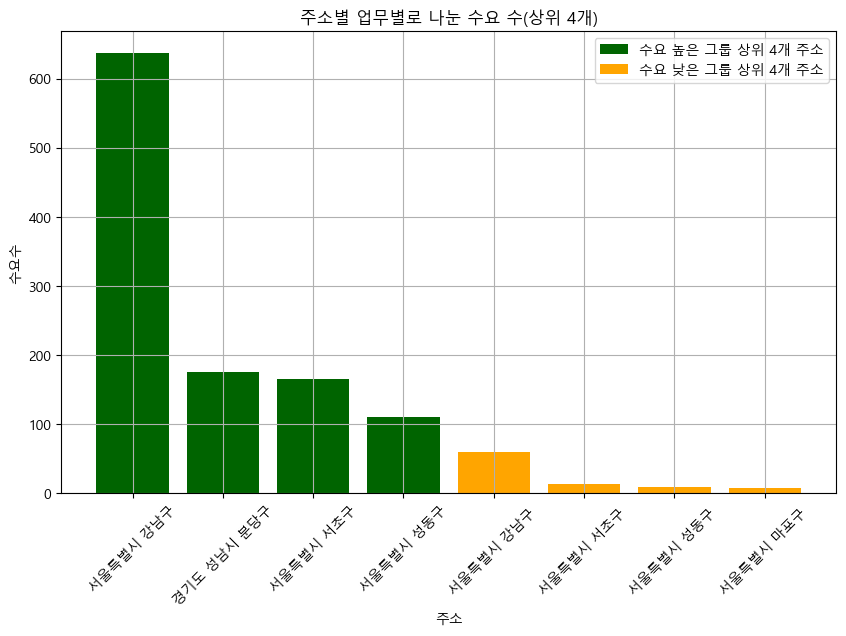

In [13]:
df = pd.DataFrame(data)

# 주소별 기업 개수 계산
address_count = df.loc[df['수요'] == 1, '주소'].value_counts().sort_values(ascending=False)
address_count_1 = df.loc[df['수요'] == 0, '주소'].value_counts().sort_values(ascending=False)

# 상위 5개 주소
top_5_address = address_count.head(4)

# 하위 5개 주소
bottom_5_address = address_count_1.head(4)

# 시각화
plt.figure(figsize=(10, 6))

# 상위 5개 주소 막대 그래프
plt.bar(top_5_address.index, top_5_address.values, color='darkgreen', label='수요 높은 그룹 상위 4개 주소')

# 하위 5개 주소 막대 그래프
plt.bar(bottom_5_address.index + ' ', bottom_5_address.values, color='Orange', label='수요 낮은 그룹 상위 4개 주소')

plt.xlabel('주소')
plt.ylabel('수요수')
plt.title('주소별 업무별로 나눈 수요 수(상위 4개)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()